## Loading the data

In [6]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

#def load_housing_data():
#    tarball_path = Path("datasets/housing.tgz")
#    if not tarball_path.is_file():
#        Path("datasets").mkdir(parents=True, exist_ok=True)
#        url = "https://github.com/ageron/data/raw/main/housing.tgz"
#        urllib.request.urlretrieve(url, tarball_path)
#        with tarfile.open(tarball_path) as housing_tarball:
#            housing_tarball.extractall(path="datasets")
#    return pd.read_csv(Path("datasets/housing/housing.csv"))
    
#housing = load_housing_data()

## Take a quick look

In [7]:
housing = pd.read_csv("C:\\Users\\mkcak\\OneDrive - Hochschule Luzern\\Documents\\Learning Projects\\Hands-on Machine Learning\\Regression\\datasets\\housing\\housing.csv")

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


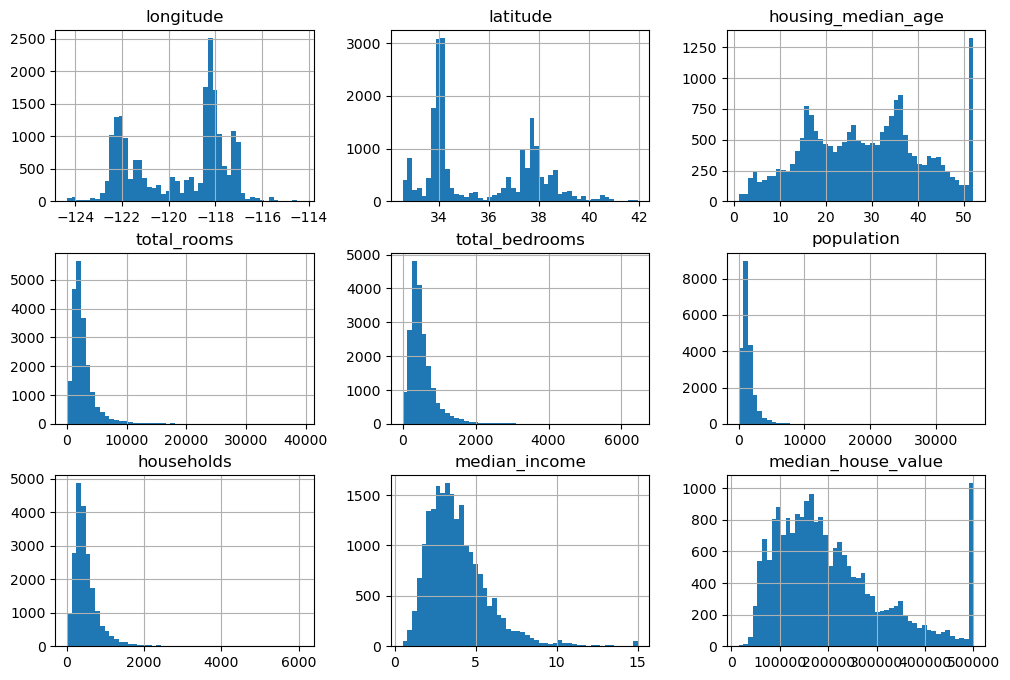

In [13]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()


In [14]:
import seaborn as sns

plt.figure(figsize=(12,8))

def plot_histograms_for_first_three_numeric_columns(housing):
    """
    Plots histograms for the first three numerical columns in the provided DataFrame.

    This function selects the first three columns of numerical data types (either float64 or int64)
    from the 'housing' DataFrame and generates a histogram for each column using seaborn's histplot.
    Each plot displays the distribution of the column's data with 50 bins and has no Kernel Density Estimate (KDE) curve.

    Parameters:
    housing (DataFrame): A pandas DataFrame containing the data, which must have at least three numerical columns.

    Returns:
    None: The function outputs the plots directly to the screen.
    """


<Figure size 1200x800 with 0 Axes>

## Split the dataset

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42 )

### Creating categorical variable

In [16]:
import numpy as np
housing["income_cat"]= pd.cut(housing["median_income"],bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

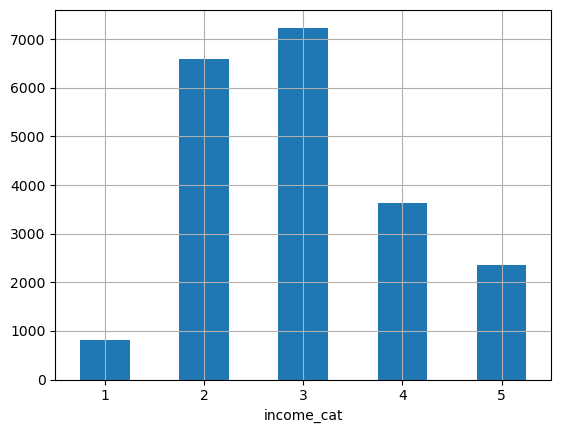

In [17]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel = "Income category"
plt.ylabel = "Number of districts"

### Splitting and stratifying together

In [18]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

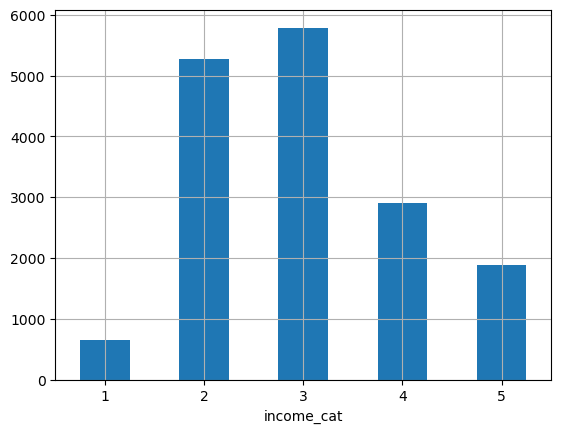

In [19]:
strat_train_set["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel = "Income category"
plt.ylabel = "Number of districts"

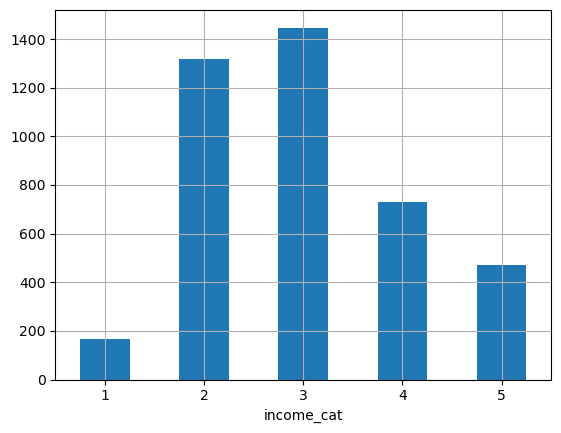

In [20]:
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel = "Income category"
plt.ylabel = "Number of districts"

## Visualization of Geographical data

In [21]:
hosuing  = strat_train_set.copy()

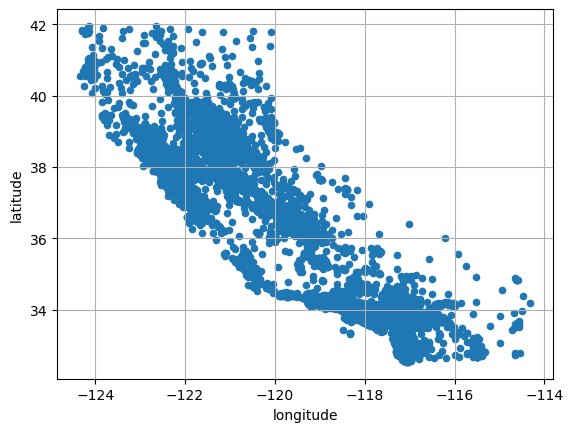

In [22]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", grid=True)
plt.show()

### Setting an alpha option to see high_density areas

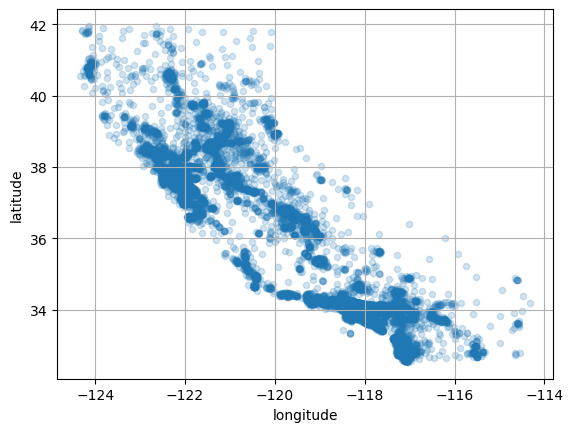

In [23]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", grid=True, alpha = 0.2)
plt.show()

### Color shows price, radius of circles shows distrcits of population

<Axes: xlabel='longitude', ylabel='latitude'>

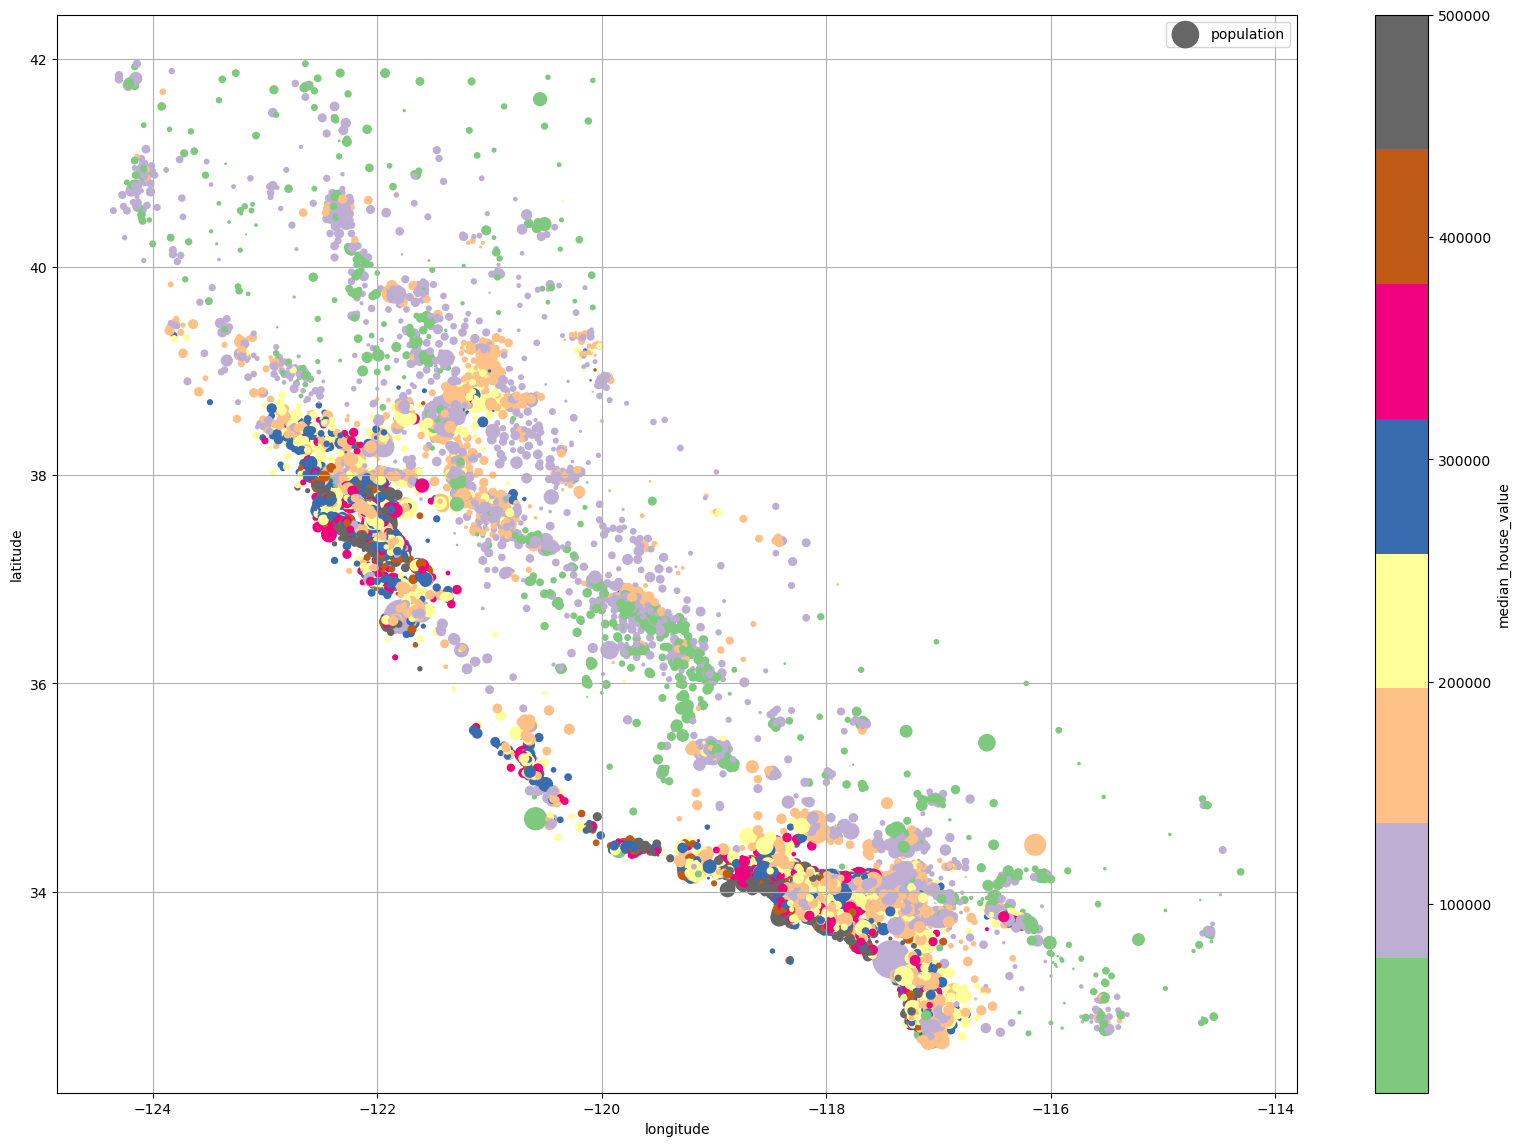

In [24]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", grid=True,
             s = housing["population"]/50, label = "population",
             c = "median_house_value", cmap = "Accent", colorbar = True,
             legend=True, sharex = False, figsize=(20,14))

### Look for correlations

In [25]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

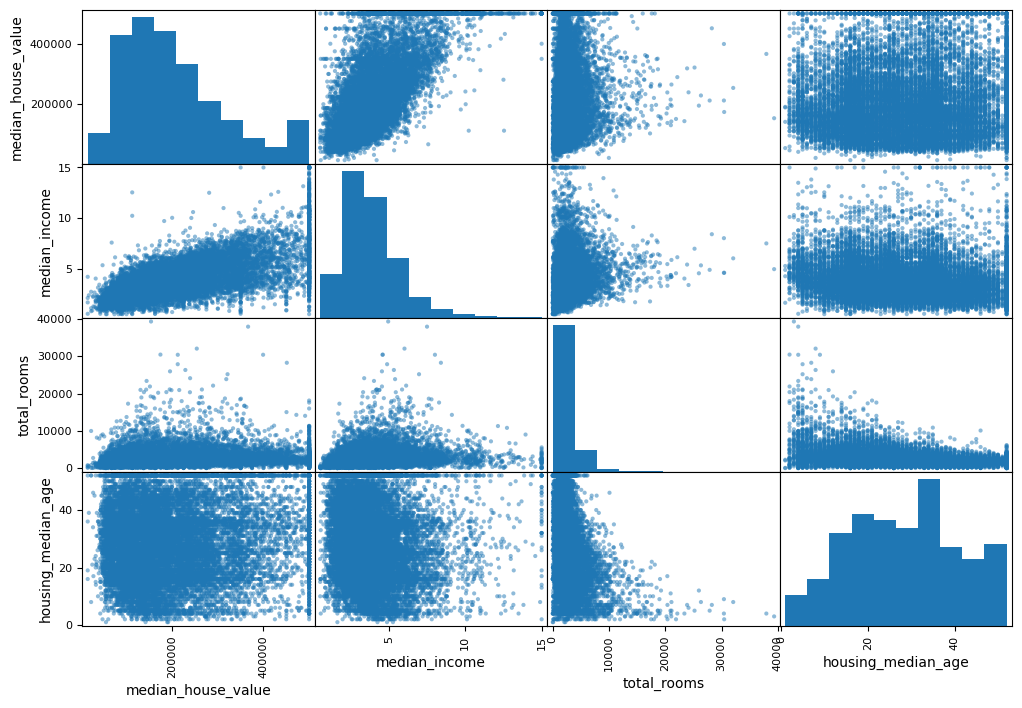

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(hosuing[attributes], figsize=(12,8))
plt.show()

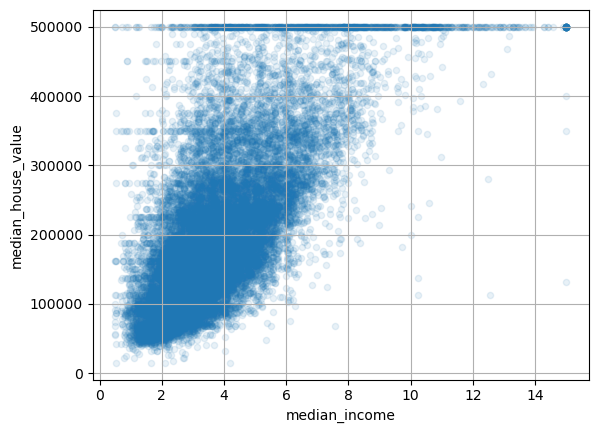

In [28]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, grid = True)
plt.show()

### Combination of attributes

In [29]:
housing["rooms_per_house"] = housing["total_rooms"]/ hosuing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] /housing["total_rooms"]
hosuing["people_per_house"] = hosuing["population"] / hosuing["households"]

In [30]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.143663
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

### Preparing data for machine learning

In [31]:
hosuing = train_set.drop("median_house_value", axis= 1)
housing_labels = strat_train_set["median_house_value"].copy()


### Dealing with missing variables

In [32]:
# median = housing["total_bedrooms"].median()
# hosuing.fillna(median, inplace=True)

### Imputer

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [34]:
housing_num = housing.select_dtypes(include = [np.number])

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.23557310e+00,  2.03162434e-01])

In [37]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.23557310e+00,  2.03162434e-01])

In [38]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096


In [39]:
X = imputer.transform(housing_num)

In [40]:
X

array([[-1.22230000e+02,  3.78800000e+01,  4.10000000e+01, ...,
         4.52600000e+05,  6.98412698e+00,  1.46590909e-01],
       [-1.22220000e+02,  3.78600000e+01,  2.10000000e+01, ...,
         3.58500000e+05,  6.23813708e+00,  1.55796591e-01],
       [-1.22240000e+02,  3.78500000e+01,  5.20000000e+01, ...,
         3.52100000e+05,  8.28813559e+00,  1.29516019e-01],
       ...,
       [-1.21220000e+02,  3.94300000e+01,  1.70000000e+01, ...,
         9.23000000e+04,  5.20554273e+00,  2.15173026e-01],
       [-1.21320000e+02,  3.94300000e+01,  1.80000000e+01, ...,
         8.47000000e+04,  5.32951289e+00,  2.19892473e-01],
       [-1.21240000e+02,  3.93700000e+01,  1.60000000e+01, ...,
         8.94000000e+04,  5.23557310e+00,  2.21184919e-01]])

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = housing_num.index)

In [42]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096


### Handling Text and Categorical Attributes

In [43]:
housing_cat = housing[["ocean_proximity"]]

In [44]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
ordinal_encoder = OrdinalEncoder()

In [47]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [48]:
housing_cat_encoded[:8]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [49]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [52]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Transformation and Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [58]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892


In [59]:
housing_num_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_scaled

array([[-0.57768924,  0.13496281,  0.56862745, ...,  0.80453276,
        -0.91355511, -0.89646465],
       [-0.57569721,  0.13071201, -0.21568627, ...,  0.41649313,
        -0.92413501, -0.87600758],
       [-0.57968127,  0.12858661,  1.        , ...,  0.39010148,
        -0.89506118, -0.93440885],
       ...,
       [-0.37649402,  0.46439957, -0.37254902, ..., -0.6812343 ,
        -0.93877964, -0.74405994],
       [-0.39641434,  0.46439957, -0.33333333, ..., -0.71257438,
        -0.93702145, -0.73357228],
       [-0.38047809,  0.45164718, -0.41176471, ..., -0.69319302,
                nan, -0.73070018]])

In [60]:
import numpy as np
from scipy.sparse import csr_matrix

# Dense matrix
dense_matrix = np.array([[1, 0, 0], [0, 3, 0], [0, 0, 5]])

# Sparse matrix
sparse_matrix = csr_matrix(dense_matrix)

print("Dense Matrix:")
print(dense_matrix)

print("\nSparse Matrix:")
print(sparse_matrix)

Dense Matrix:
[[1 0 0]
 [0 3 0]
 [0 0 5]]

Sparse Matrix:
  (0, 0)	1
  (1, 1)	3
  (2, 2)	5
